**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### Business Understanding

We have a business challenge to discover what influences the price of used cars. We'll apply CRISP-DM and several Machine Learning techniques to achieve this goal!

### problem statement 

As a used car dealer, staying on top of the constantly changing market value of your cars is an essential part of running a successful business. To remain competitive in this space, predicting the true worthof each vehicle based on its attributes can be critical to accurate pricing and increased customer interest. Developing a predictive model that considers factors such as make, model year, mileage and condition could help ensure you get more bang for your buck when setting prices and attract new customers.

Several machine learning models can be used to predict the value of a user's car. The choice of model depends on several factors, including the size and quality of the available data, the complexity of the problem, and the desired level of accuracy. Some of the commonly used models for car value prediction include:

1.	Linear regression: This simple model fits a linear equation to the data to predict the car's value. It works well with a linear relationship between the input features and the output value.
2.	Random Forest: This is a powerful model that can handle both categorical and continuous features. It works well when there are many input features, and the relationship between them and the output value is complex.
3.	Gradient Boosting: This model uses an ensemble of weak learners to make predictions. It works well when there are many input features, and the relationship between them and the output value is complex.
4.	Neural Networks: This powerful model can handle complex relationships between the input features and the output value. It works well when a large amount of data is available, and the relationship between the input features and the output value is non-linear.

It is important to note that the model's accuracy depends on the quality and quantity of the data used for training. Therefore, having a large, diverse, and high-quality dataset is essential to train the model for accurate predictions.


The business problem could involve addressing the following questions:

1. How can we develop a predictive model that accurately estimates the value of a used car based on its attributes?
2. Which features are the most important in determining the value of a used car?
3. How can we validate the accuracy of the predictive model?
4. How can we use the predictive model to set competitive prices for our used cars?
5. How can we update the predictive model to reflect changes in the market and in the availability of data?

By addressing these questions, the used car dealer could develop a data-driven approach to pricing their used cars that takes into account the unique features of each car and the current market conditions. This could lead to increased customer satisfaction, increased sales, and improved profitability for the dealership.





We are exploring two innovative approaches to predicting the value of used cars from a dataset containing three million entries. The first method is linear regression, an intuitive machine learning technique which draws meaningful insights from data using mathematical models and equations. Our second approach involves KMeans(), a powerful clustering algorithm provided by scikit-learn library in Python that organizes similar data points into clusters for unsupervised learning. By randomly selecting K centroids and iteratively assigning them until convergence is reached, we can gain valuable insight about how car attributes shape their market value!

In [342]:
import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Processing
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score



data/vehicles.csv


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [371]:

UsedCar_data = pd.read_csv('data/vehicles.csv')
print(f'''number of rows - {UsedCar_data.shape[0]}
number of columns - {UsedCar_data.shape[1]}''')


number of rows - 426880
number of columns - 18


In [372]:

df=open('OutPut.txt','w')
nan_count = UsedCar_data.isna().sum()
df.write(nan_count.to_markdown())
df.close()
print(nan_count)


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [373]:
UsedCar_data_r1 = UsedCar_data.drop(['id','VIN','drive','state' ,'region','title_status','paint_color'], axis=1)
df=open('OutPut1.txt','w')
nan_count = UsedCar_data_r1.isna().sum()
df.write(nan_count.to_markdown())
df.close()
print(nan_count)
print(UsedCar_data_r1.info())

print(f'''number of rows - {UsedCar_data_r1.shape[0]}
number of columns - {UsedCar_data_r1.shape[1]}''')


price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
size            306361
type             92858
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   transmission  424324 non-null  object 
 9   size          120519 non-null  object 
 10  type          334022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usag

In [374]:


df=open('OutPut_nan.txt','w')
nan_Data = pd.DataFrame({'features': UsedCar_data_r1.columns,
               'dtypes': UsedCar_data_r1.dtypes.values,
               'NaN count': UsedCar_data_r1.isnull().sum().values,
               'NaN percentage': UsedCar_data_r1.isnull().sum().values/UsedCar_data_r1.shape[0]})
df.write(nan_Data.to_markdown())
df.close()



In [375]:
UsedCar_data_r2 = UsedCar_data_r1.dropna(thresh=2)
nan_count = UsedCar_data_r2.isna().sum()


UsedCar_data_r2.loc[UsedCar_data_r2['year'].isnull(),'year'] = 0
UsedCar_data_r2.loc[UsedCar_data_r2['transmission'].isnull(),'transmission'] = 'NaN_tran'
UsedCar_data_r2.loc[UsedCar_data_r2['condition'].isnull(),'condition'] = 'salvage'
UsedCar_data_r2.loc[UsedCar_data_r2['size'].isnull(),'size'] = 'Unknown_size'
UsedCar_data_r2.loc[UsedCar_data_r2['type'].isnull(),'type'] = 'NaN_type'
UsedCar_data_r2.loc[UsedCar_data_r2['manufacturer'].isnull(),'manufacturer'] = 'Unknown_man'
UsedCar_data_r2.loc[UsedCar_data_r2['model'].isnull(),'model'] = 'NaN_model'
UsedCar_data_r2.loc[UsedCar_data_r2['cylinders'].isnull(),'cylinders'] = 'NaN_cylinders'
UsedCar_data_r2.loc[UsedCar_data_r2['fuel'].isnull(),'fuel'] = 'NaN_fuel'
UsedCar_data_r2.loc[UsedCar_data_r2['odometer'].isnull(),'odometer'] = 0

nan_count = UsedCar_data_r2.isna().sum()
nan_count

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
size            0
type            0
dtype: int64

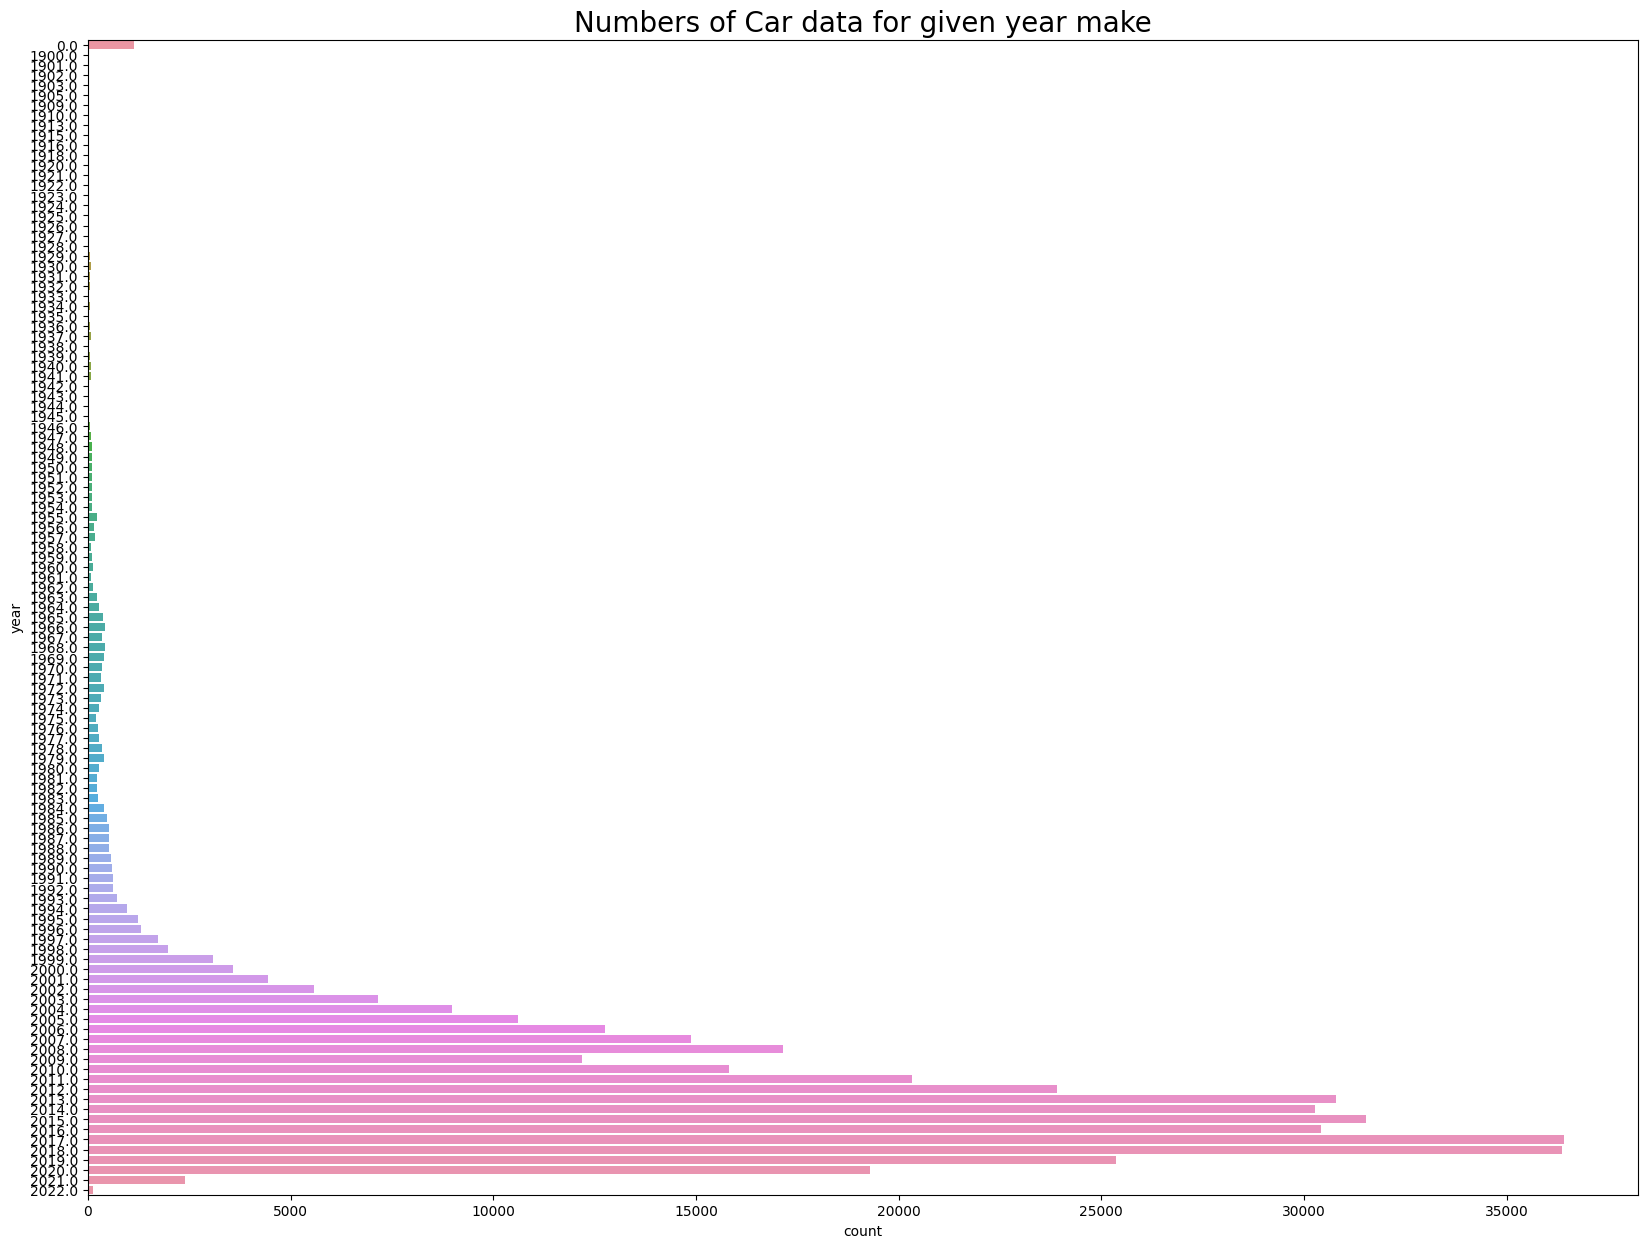

In [376]:

plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.year)
plt.title("Numbers of Car data for given year make", fontsize = 20)
plt.show()



Based on the result drop the adat for year less then 1995

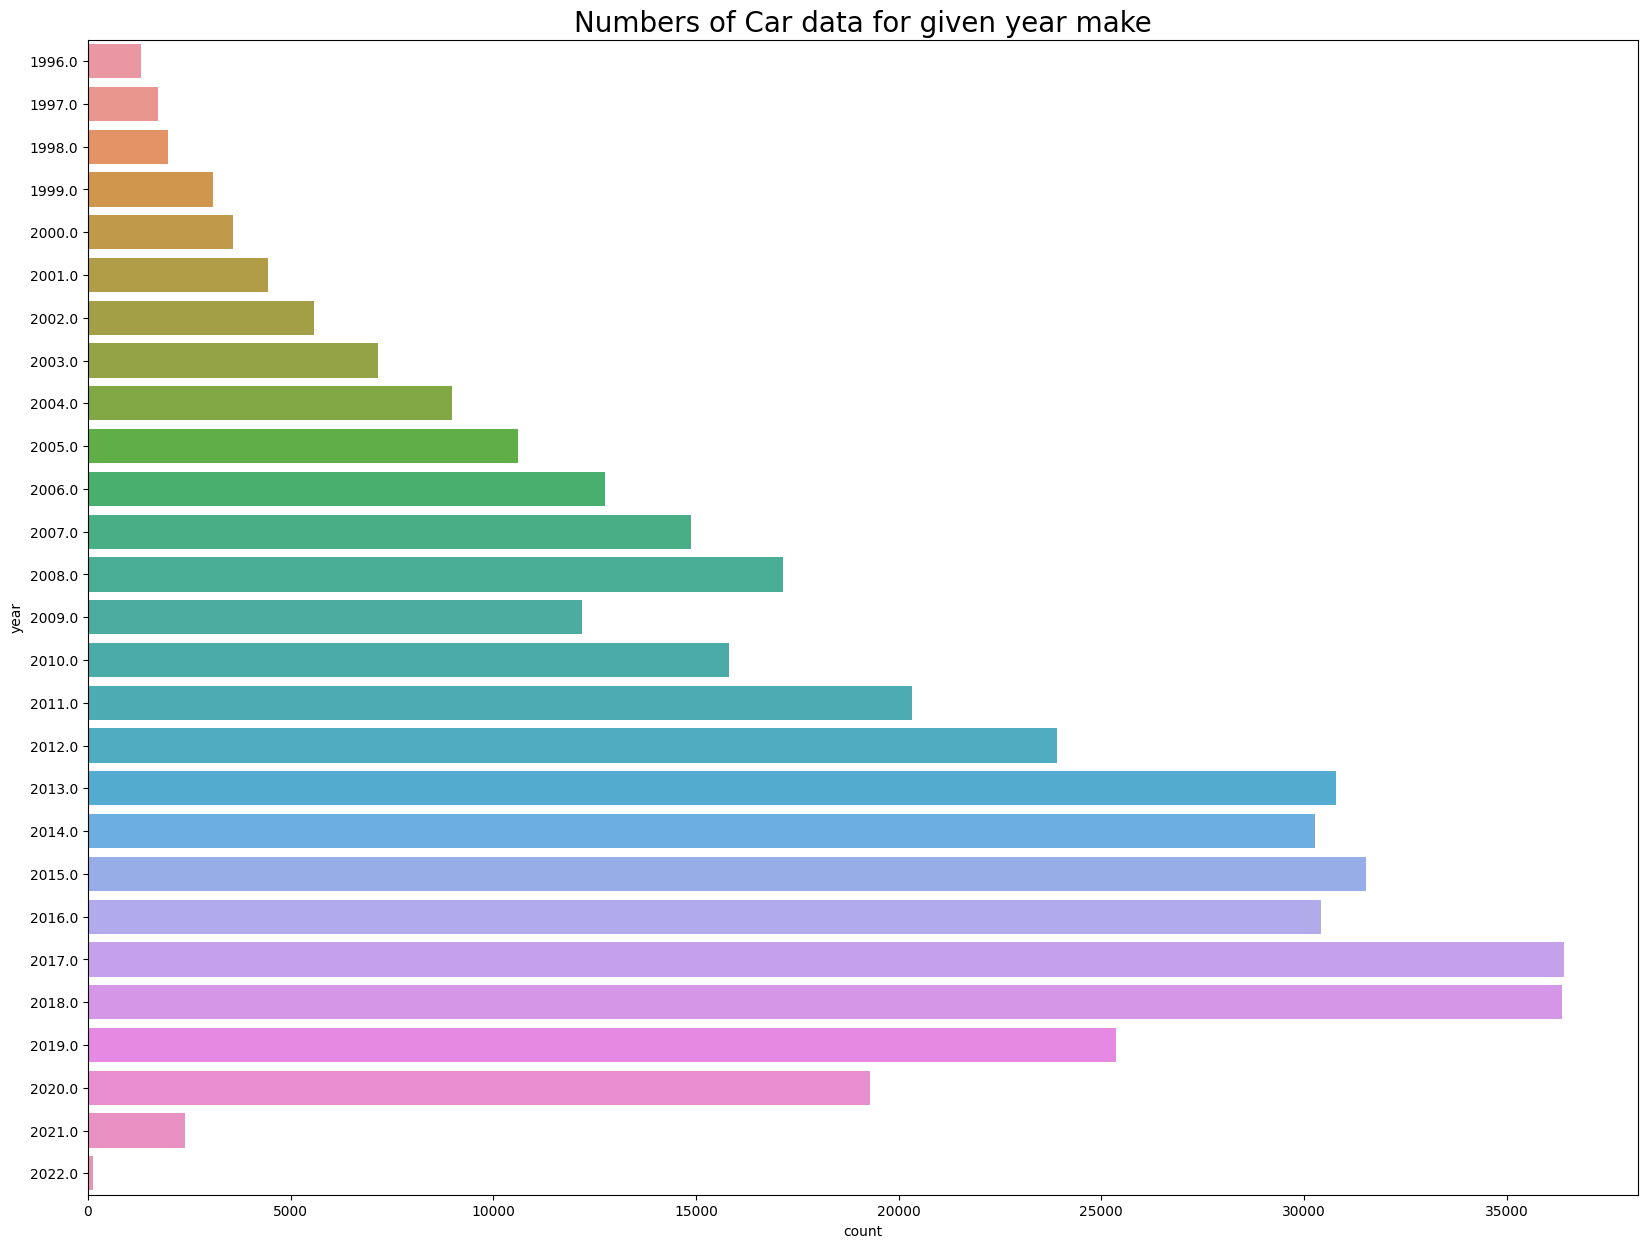

In [377]:


UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["year"] > 1995 ]
#UsedCar_data_r3 = UsedCar_data_r2[UsedCar_data_r2['year'] > 1995] 


plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.year)
plt.title("Numbers of Car data for given year make", fontsize = 20)
plt.show()

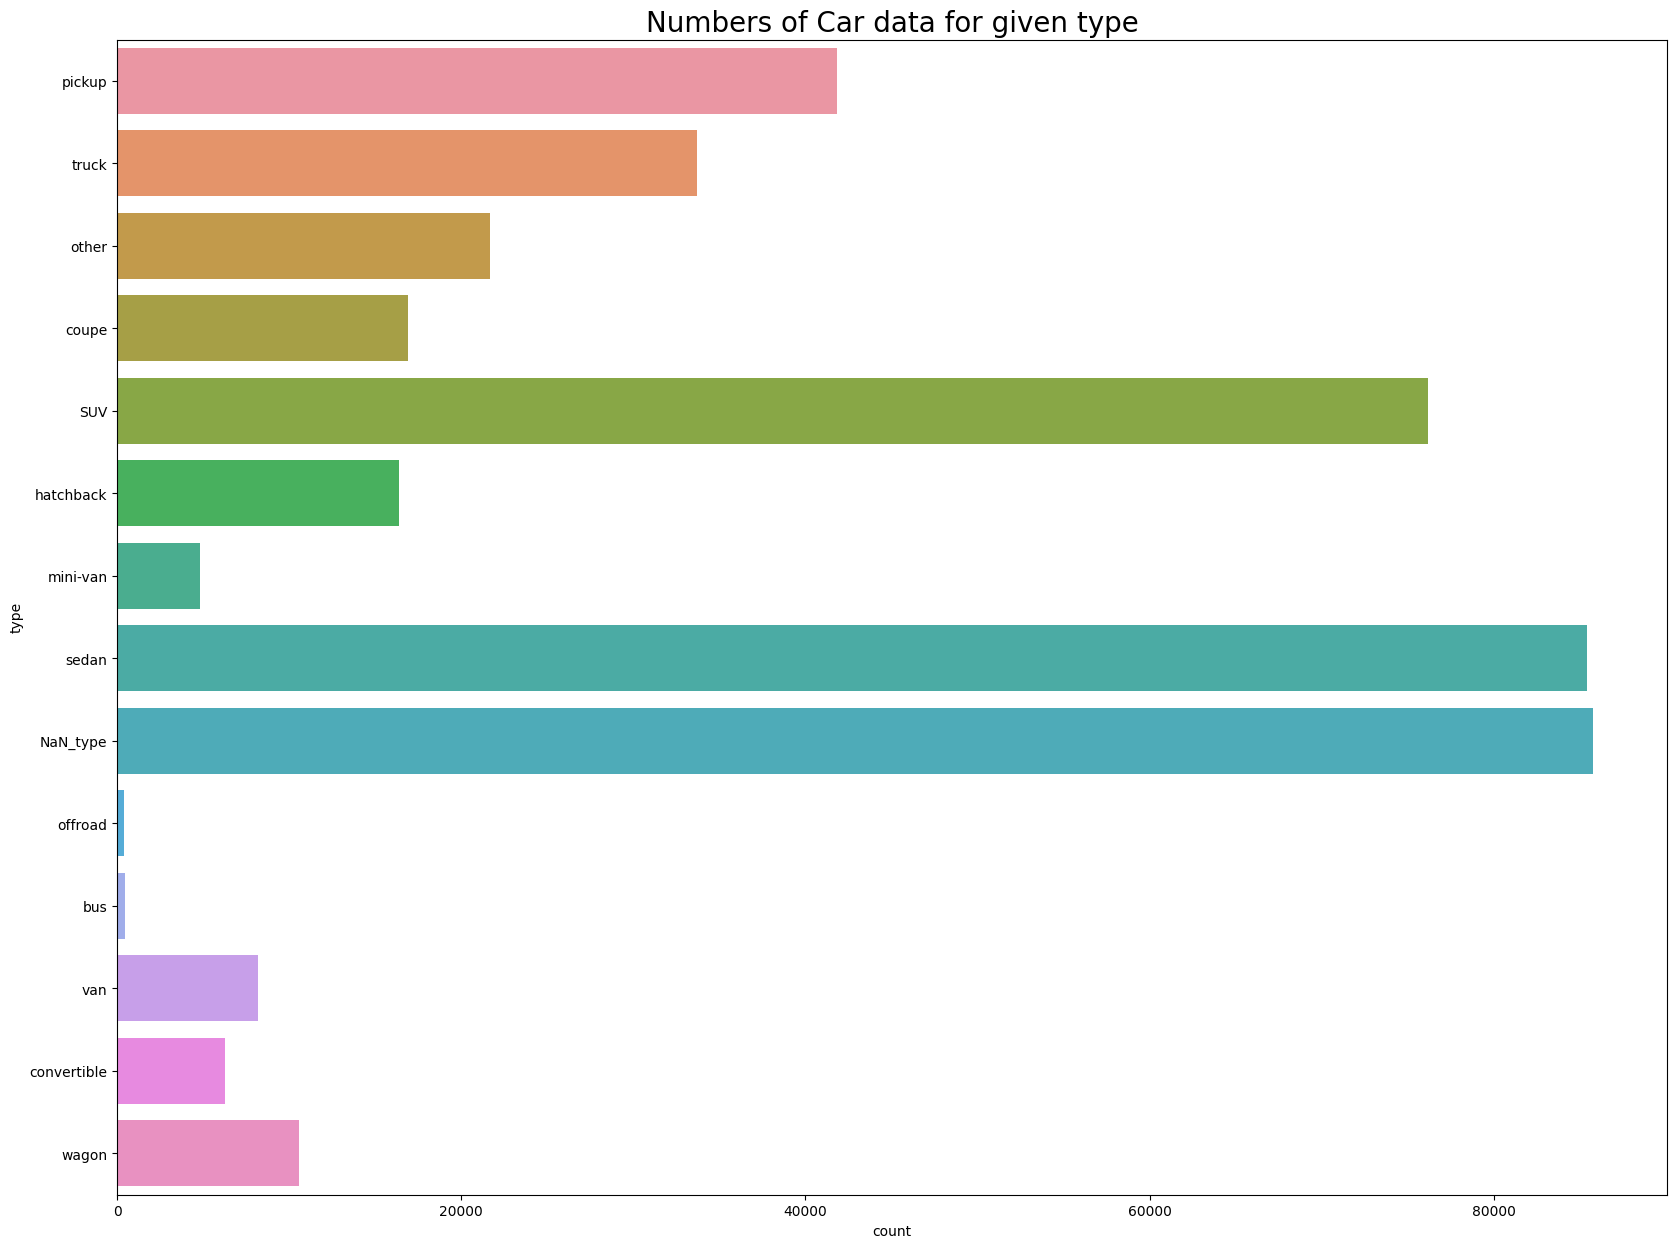

In [378]:
plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.type)
plt.title("Numbers of Car data for given type", fontsize = 20)
plt.show()


Based on the result drop the rows for type = ['pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan' 'van' 'convertible' 'wagon']

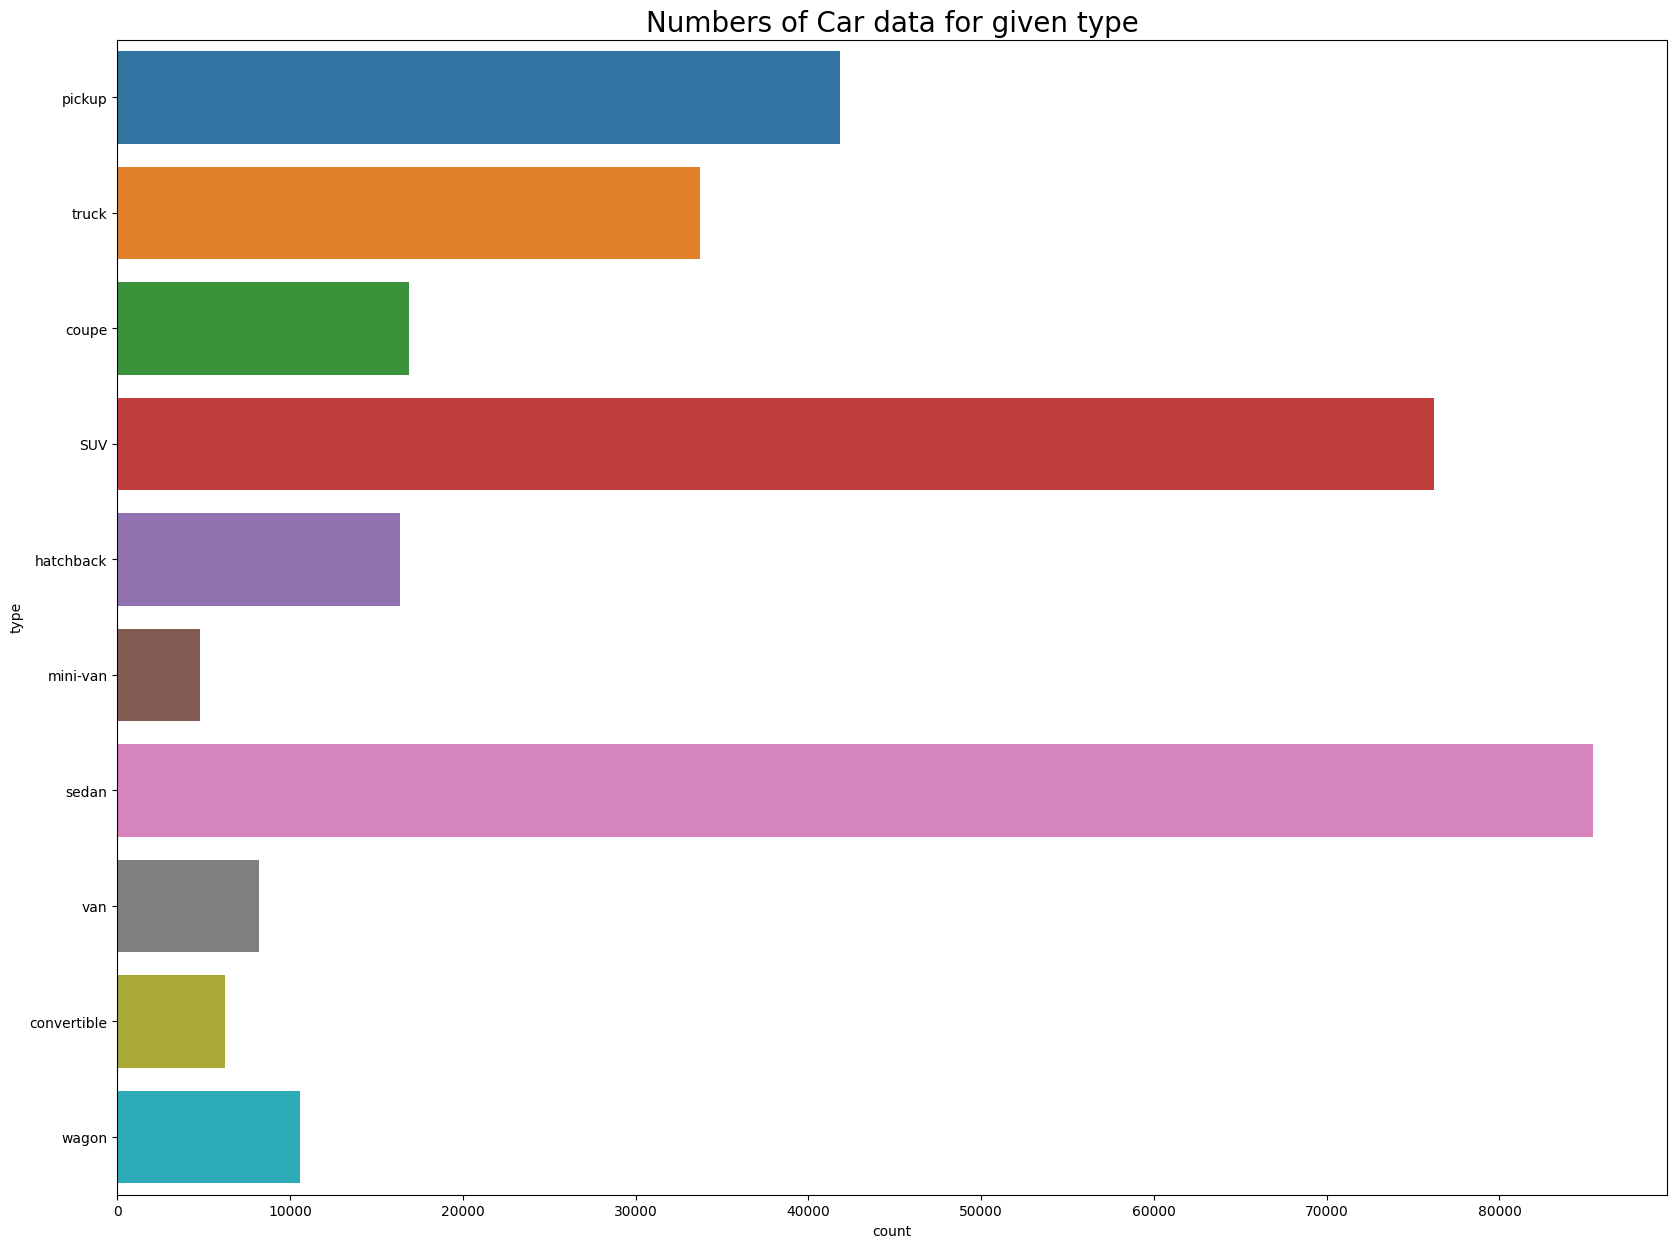

In [379]:
#print(UsedCar_data_r2["type"].unique())
UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["type"].isin(['pickup', 'truck', 'coupe', 'SUV' ,'hatchback', 'mini-van', 'sedan', 'van' ,'convertible', 'wagon'])]
plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.type)
plt.title("Numbers of Car data for given type", fontsize = 20)
plt.show()


afteer keeping only ["cylinders"].isin(['8 cylinders','6 cylinders','4 cylinders']

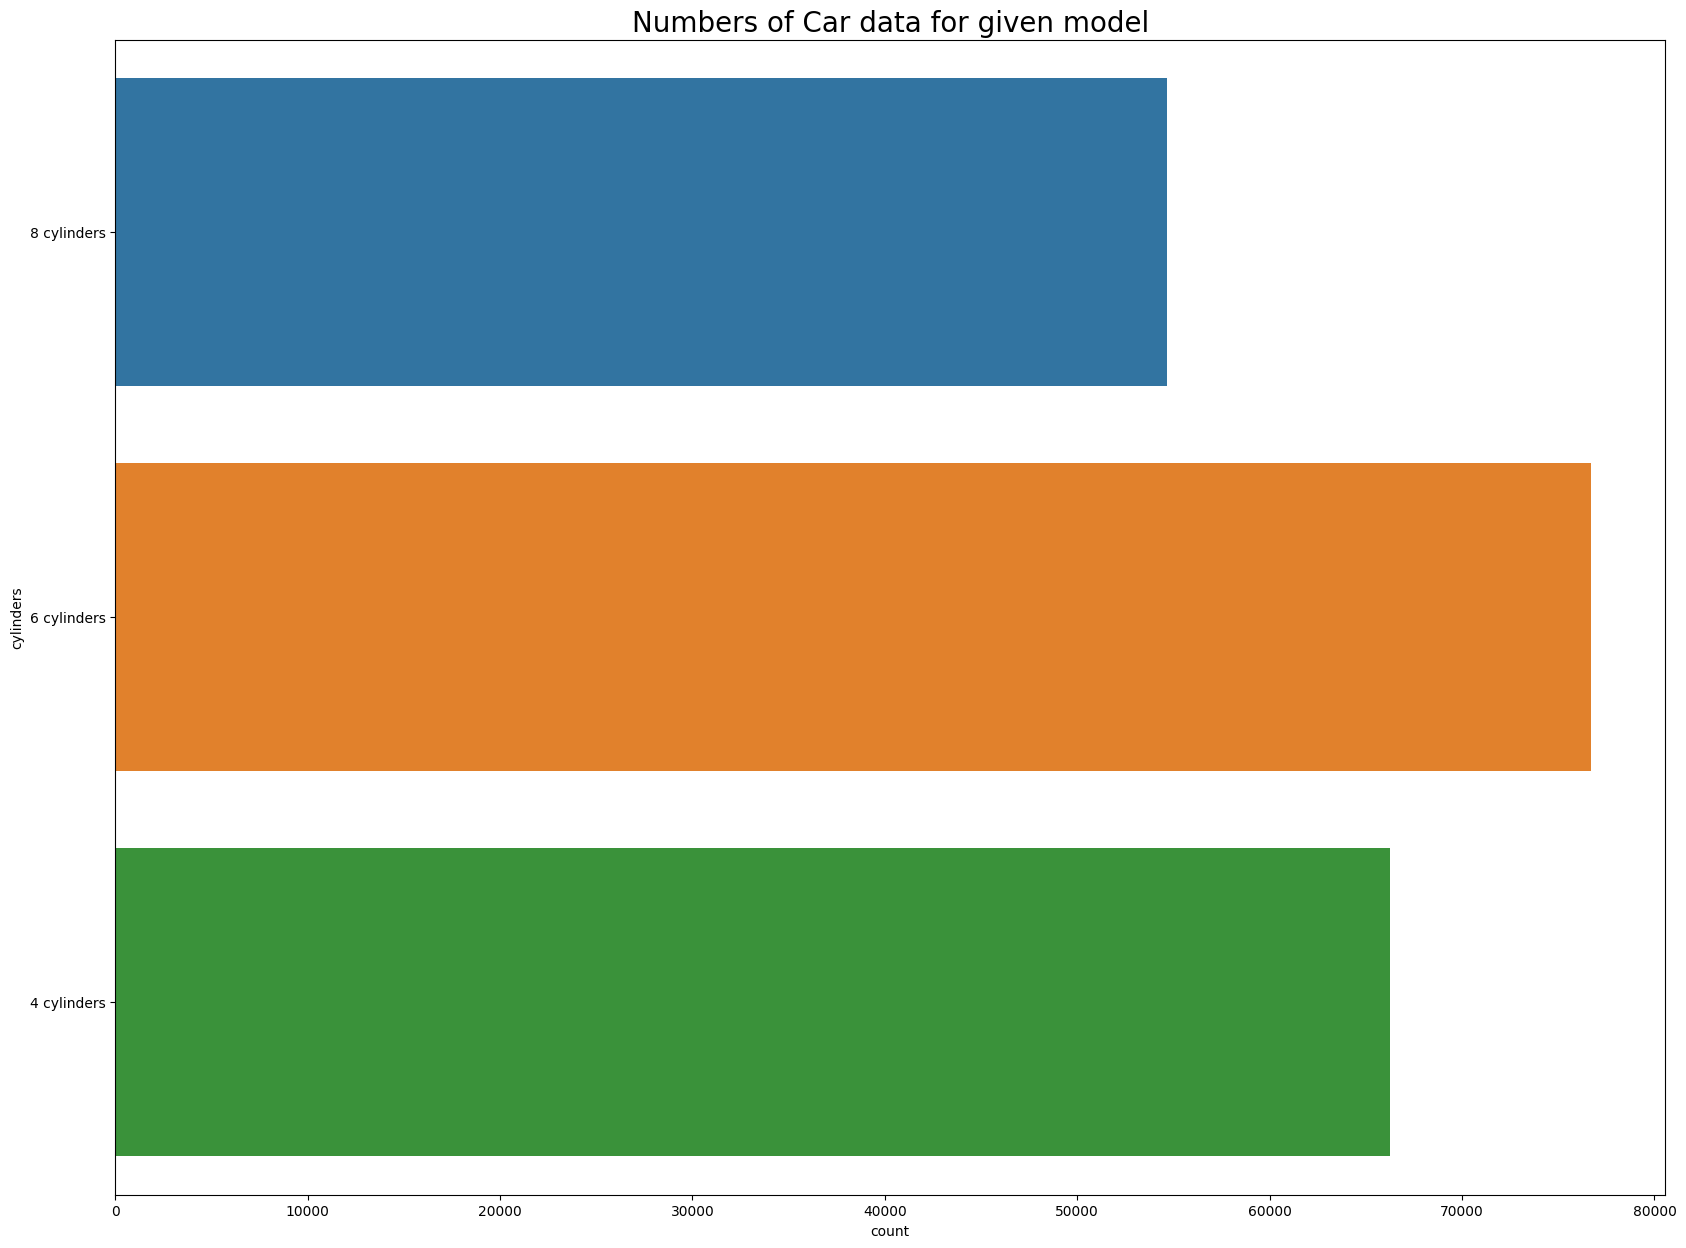

In [380]:
UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["cylinders"].isin(['8 cylinders','6 cylinders','4 cylinders'])]
plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.cylinders)
plt.title("Numbers of Car data for given model", fontsize = 20)
plt.show()


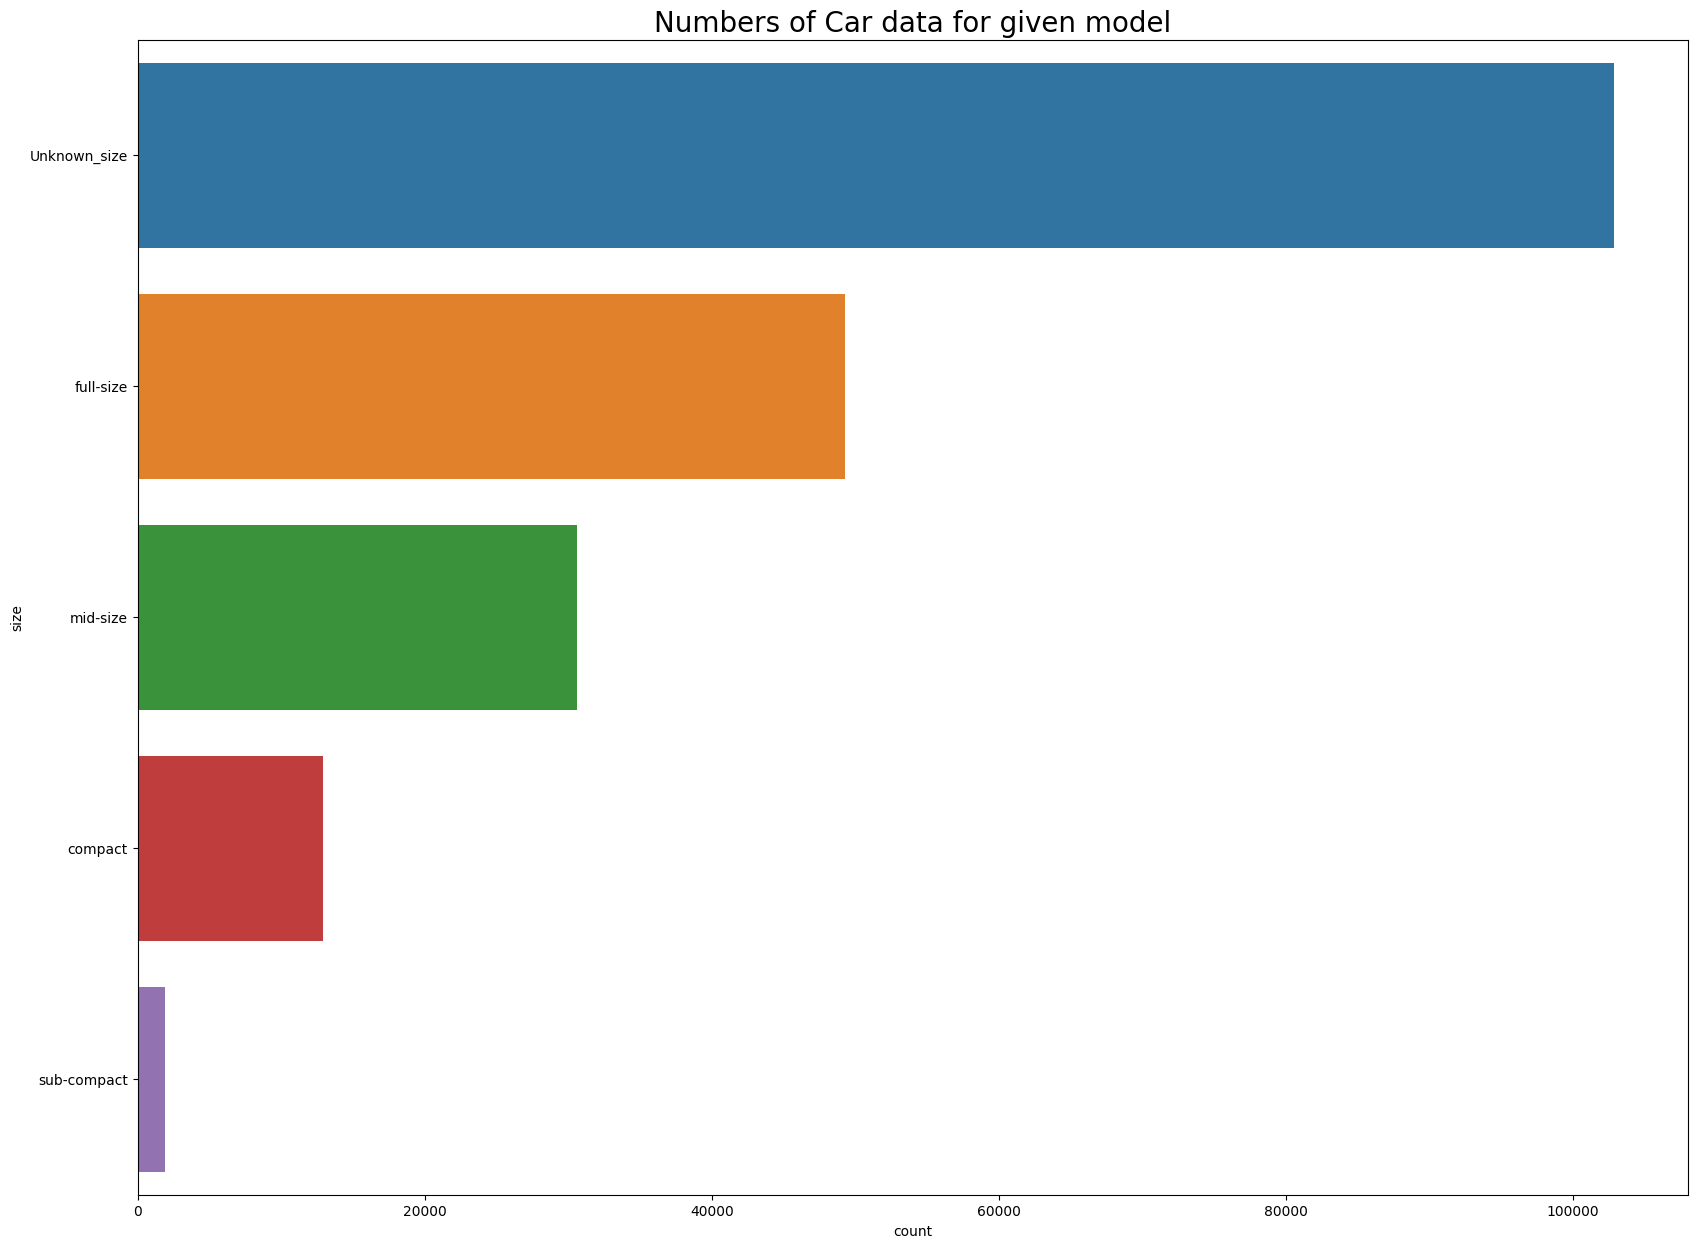

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197596 entries, 27 to 426878
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         197596 non-null  int64  
 1   year          197596 non-null  float64
 2   manufacturer  197596 non-null  object 
 3   model         197596 non-null  object 
 4   condition     197596 non-null  object 
 5   cylinders     197596 non-null  object 
 6   fuel          197596 non-null  object 
 7   odometer      197596 non-null  float64
 8   transmission  197596 non-null  object 
 9   type          197596 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 16.6+ MB


In [381]:

#UsedCar_data_r3 = UsedCar_data_r3.loc[UsedCar_data_r3["cylinders"].isin(['8 cylinders','6 cylinders','4 cylinders'])]
#UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["cylinders"].isin(['8 cylinders','6 cylinders','4 cylinders'])]
#UsedCar_data_r2 = UsedCar_data_r2.drop('size', axis=1)
plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2['size'])
plt.title("Numbers of Car data for given model", fontsize = 20)
plt.show()
UsedCar_data_r2 = UsedCar_data_r2.drop('size', axis=1)
UsedCar_data_r2.info()

there are large numbers of unkokn e size thre for we will drop the colum size

In [382]:
# corr_matrix = UsedCar_data_r2.corr(numeric_only = True)
# sns.heatmap(corr_matrix, annot=True)
# plt.show()
UsedCar_data_r2['condition'].unique()
one_hot = pd.get_dummies(UsedCar_data_r2['fuel'])
UsedCar_data_r2 = UsedCar_data_r2.drop('fuel',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)


#UsedCar_data_r2.info()
# UsedCar_data_r4 = pd.get_dummies(UsedCar_data_r3['condition'])
# UsedCar_data_r5 = pd.get_dummies(UsedCar_data_r4['cylinders'])
# UsedCar_data_r6 = pd.get_dummies(UsedCar_data_r5['type'])
# UsedCar_data_r7 = pd.get_dummies(UsedCar_data_r6['transmission'])


In [383]:

one_hot = pd.get_dummies(UsedCar_data_r2['condition'])
UsedCar_data_r2 = UsedCar_data_r2.drop('condition',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)

# UsedCar_data_r4 = pd.get_dummies(UsedCar_data_r3['condition'])
# UsedCar_data_r5 = pd.get_dummies(UsedCar_data_r4['cylinders'])
# UsedCar_data_r6 = pd.get_dummies(UsedCar_data_r5['type'])
# UsedCar_data_r7 = pd.get_dummies(UsedCar_data_r6['transmission'])




In [384]:
#UsedCar_data_r2['type'].unique()
one_hot = pd.get_dummies(UsedCar_data_r2['type'])
UsedCar_data_r2 = UsedCar_data_r2.drop('type',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)


In [385]:
UsedCar_data_r2['transmission'] = UsedCar_data_r2['transmission'].replace('other','other_tarn')

one_hot = pd.get_dummies(UsedCar_data_r2['transmission'])
UsedCar_data_r2 = UsedCar_data_r2.drop('transmission',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)



In [386]:
one_hot = pd.get_dummies(UsedCar_data_r2['cylinders'])
UsedCar_data_r2 = UsedCar_data_r2.drop('cylinders',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)

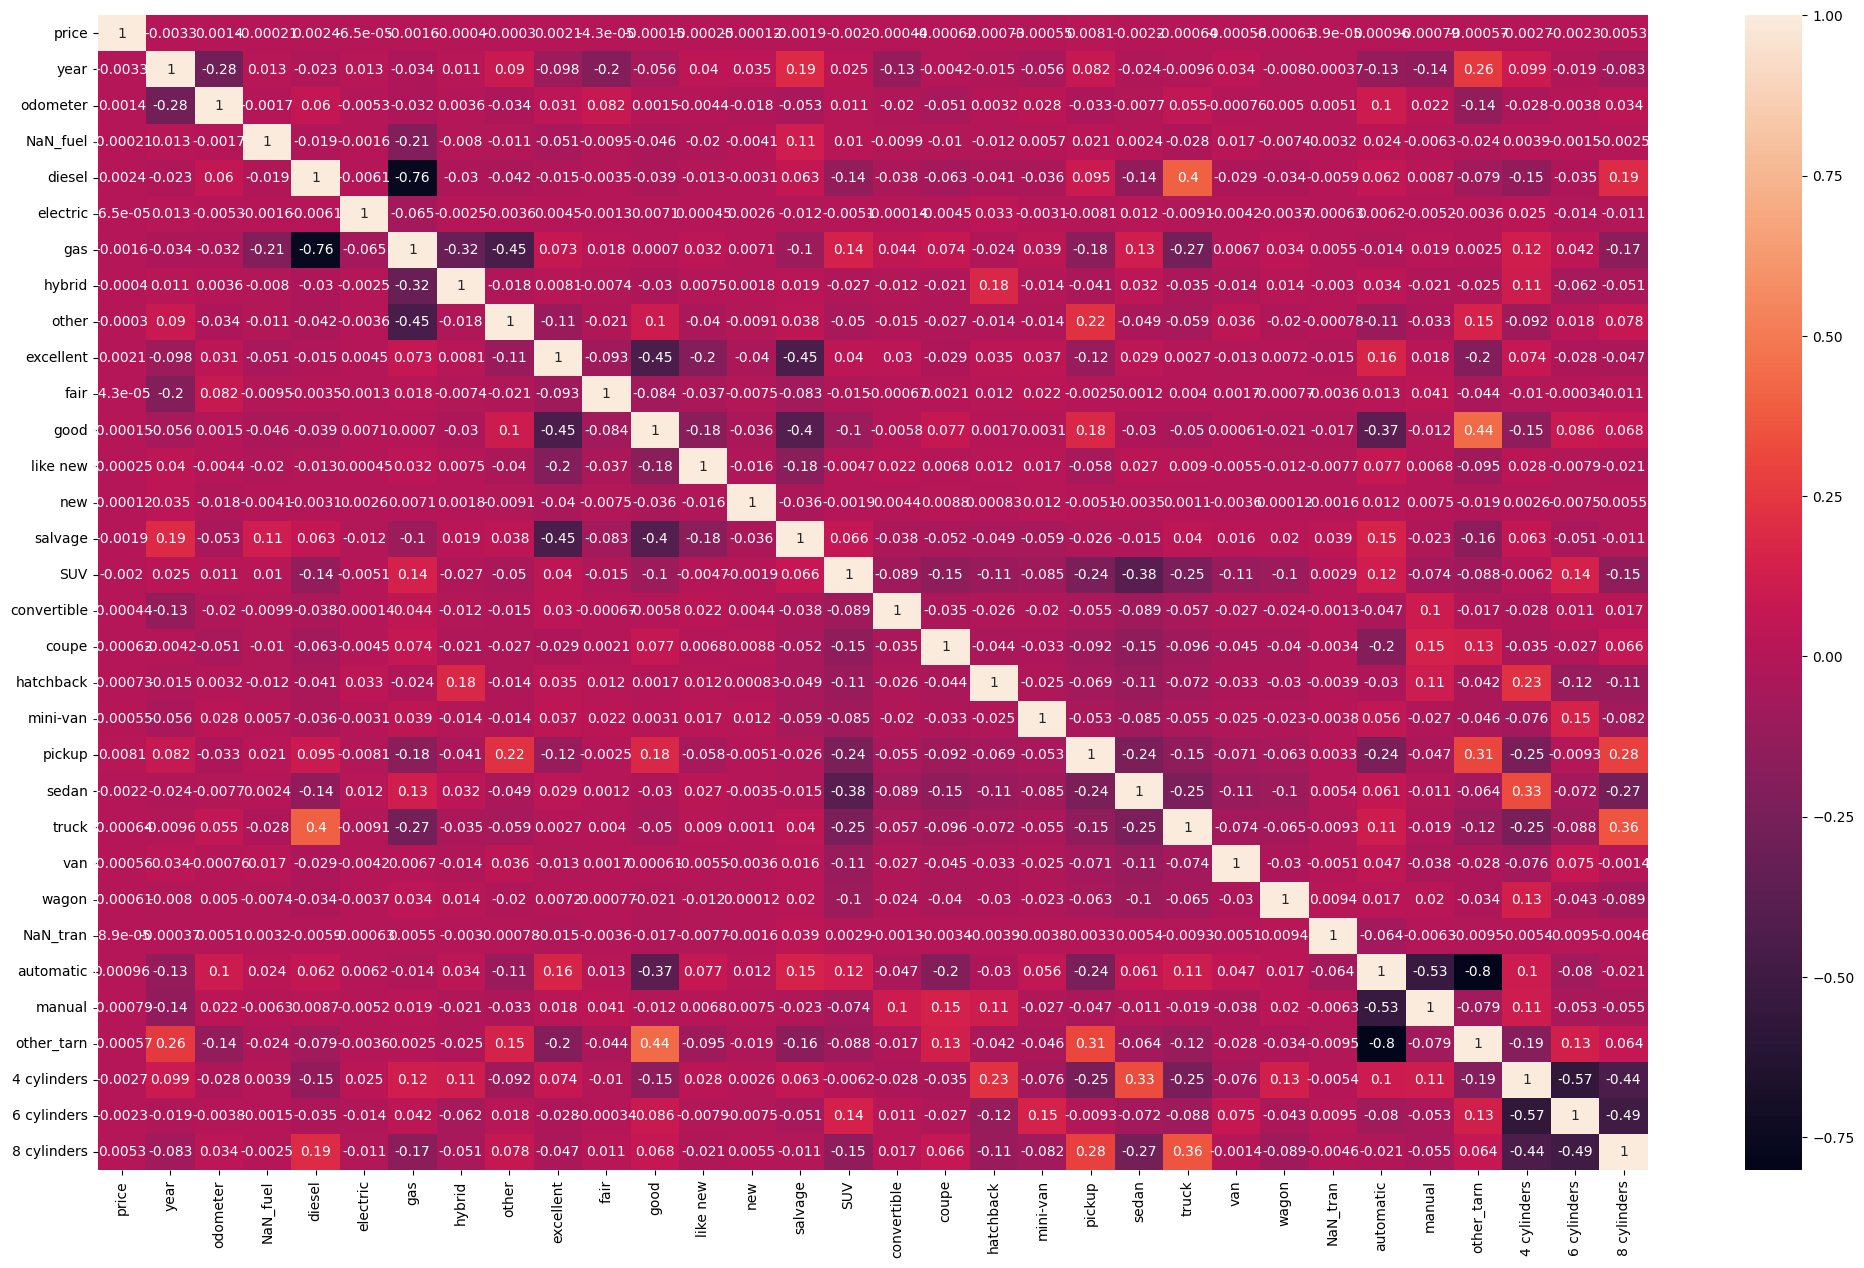

In [387]:
plt.figure(figsize = (25,15))
corr_matrix = UsedCar_data_r2.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

3


Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares




### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

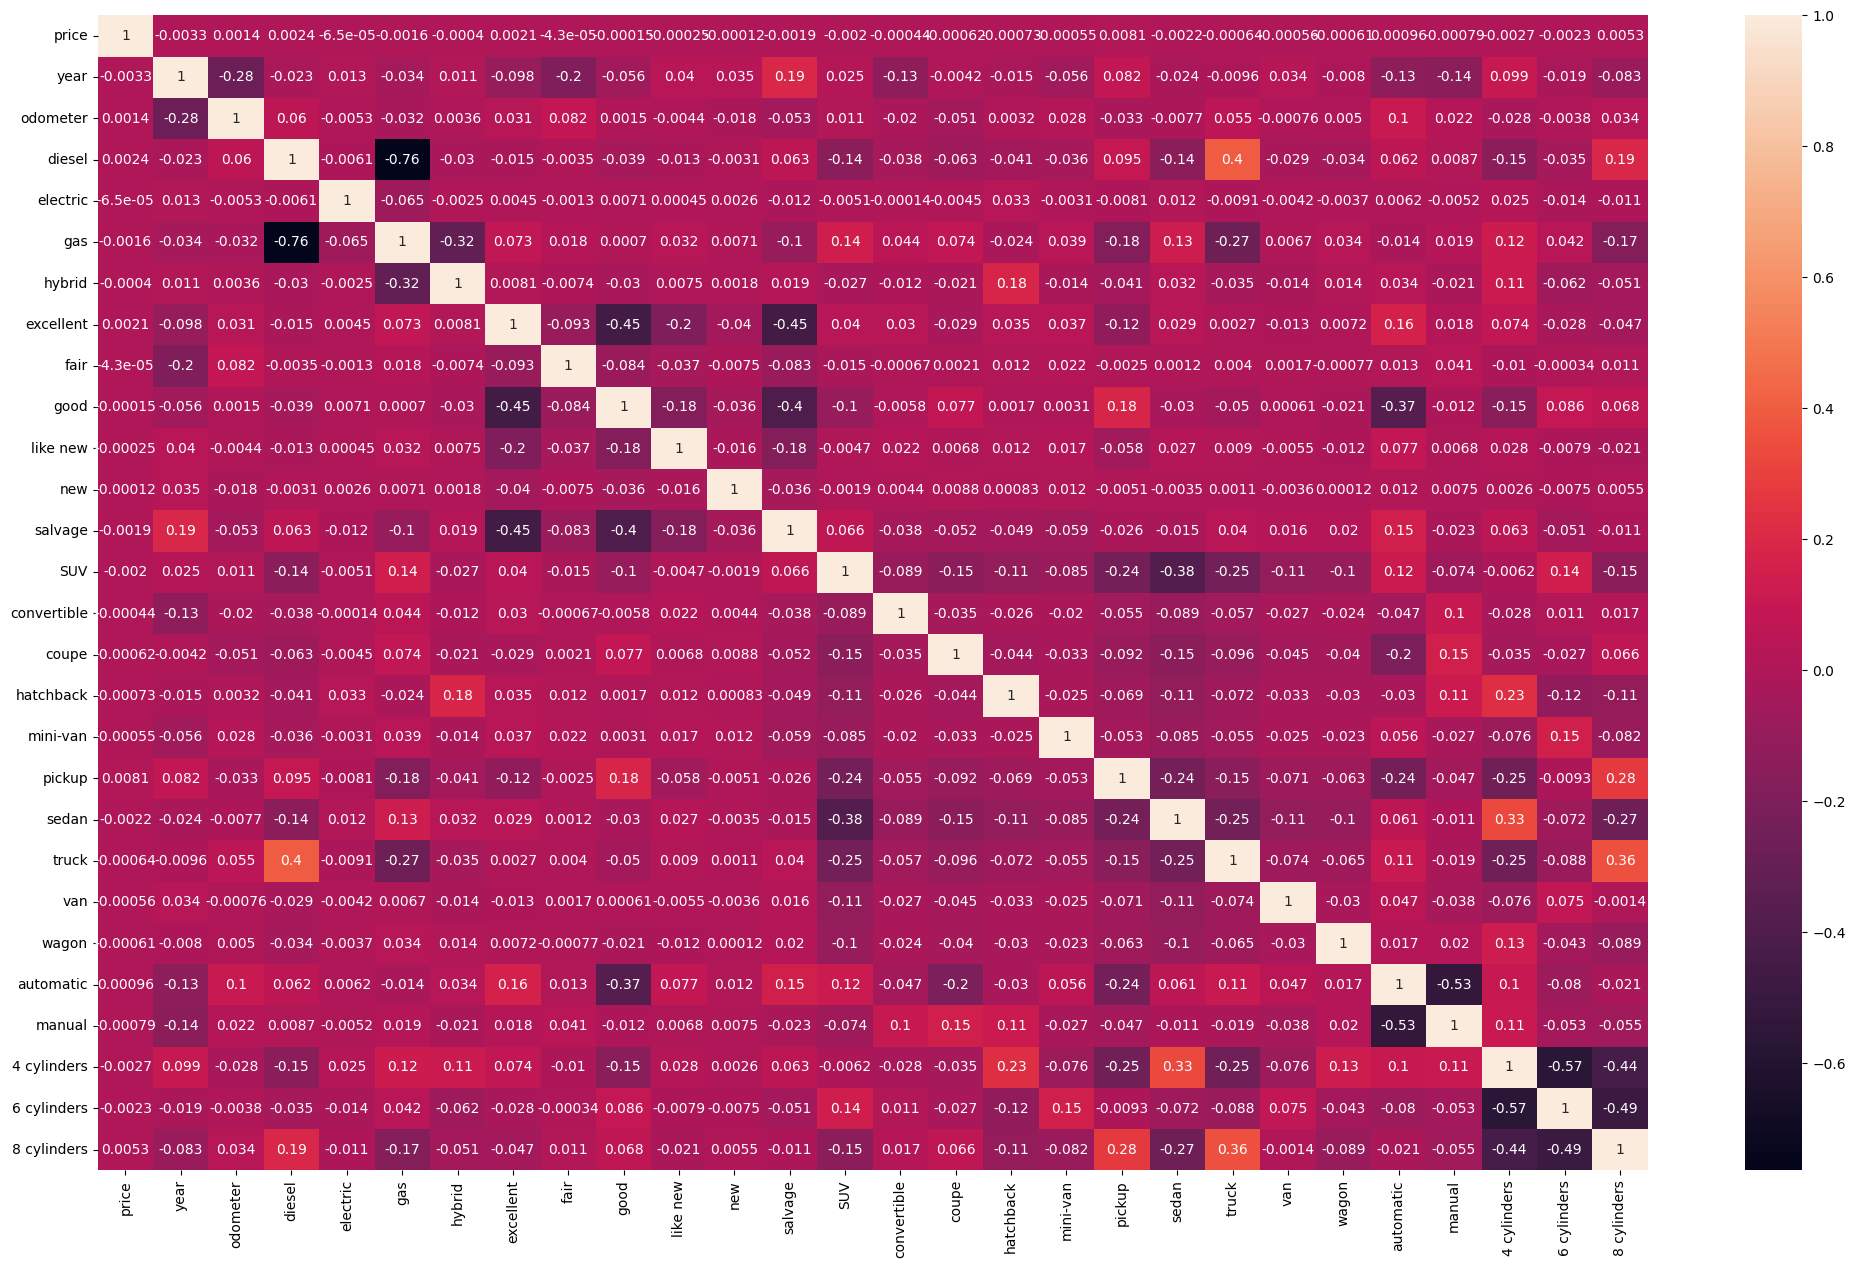

In [388]:
UsedCar_data_r2 = UsedCar_data_r2.drop(['NaN_fuel','other','NaN_tran','other_tarn'],axis = 1)
plt.figure(figsize = (25,15))
corr_matrix = UsedCar_data_r2.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [389]:
#UsedCar_data_r2 = UsedCar_data_r2.drop('model',axis = 1)
UsedCar_data_r2.info()
UsedCar_data_r2 = UsedCar_data_r2.drop('manufacturer',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.drop('model',axis = 1)
#UsedCar_data_r2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 197596 entries, 27 to 426878
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         197596 non-null  int64  
 1   year          197596 non-null  float64
 2   manufacturer  197596 non-null  object 
 3   model         197596 non-null  object 
 4   odometer      197596 non-null  float64
 5   diesel        197596 non-null  uint8  
 6   electric      197596 non-null  uint8  
 7   gas           197596 non-null  uint8  
 8   hybrid        197596 non-null  uint8  
 9   excellent     197596 non-null  uint8  
 10  fair          197596 non-null  uint8  
 11  good          197596 non-null  uint8  
 12  like new      197596 non-null  uint8  
 13  new           197596 non-null  uint8  
 14  salvage       197596 non-null  uint8  
 15  SUV           197596 non-null  uint8  
 16  convertible   197596 non-null  uint8  
 17  coupe         197596 non-null  uint8  
 18  hat

In [390]:
from sklearn.preprocessing import MinMaxScaler

X = UsedCar_data_r2.drop(['price'], axis=1).values
y = UsedCar_data_r2['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

print(y_test)
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_new = scaler.transform(X_train)
# X_test_new = scaler.transform(X_test)

[    0 58995  5900 ... 13988 26999 14750]


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [391]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)

y_predict = model.predict(X_test)
print(mean_squared_error(y_predict, y_test))
print(mean_absolute_error(y_predict, y_test))

# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)
# error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
# error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

[-2.92155797e+03  5.39431341e-02  2.50351247e+04  9.10979561e+04
  8.17905468e+04  7.50122472e+04  6.21630200e+04 -5.78842889e+04
 -2.11006448e+04  1.39589583e+04  4.90798175e+03 -2.04502643e+03
 -2.19700951e+04 -4.31371610e+04 -6.01641423e+03 -1.92057493e+04
 -3.39671191e+04  2.02831114e+05 -1.61483361e+04 -3.13419648e+04
 -1.37495687e+04 -1.72947056e+04  4.83780266e+04  2.01810548e+04
 -2.12375596e+04 -2.19647946e+04  4.32023542e+04]
32093147300679.29
100929.70898129532


Text(0, 0.5, 'Predicted Y')

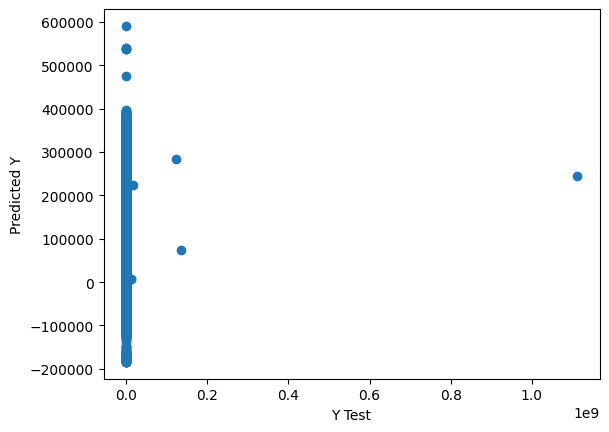

In [392]:
plt.scatter(x = y_test, y = y_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

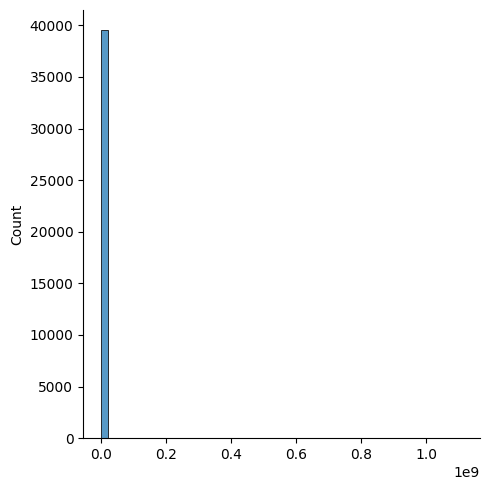

In [393]:
sns.displot((y_test-y_predict), bins = 50)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Although I had put in effort to clean the dataset and applied a linear regression model, my expectations of success were not met. It appears that I need some personalized guidance to make sense of this assignment.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.